In [62]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image as image

In [90]:
img = imread("map_source/TRIALMAP.jpg")

In [16]:
def convert_to_grayscale(rgb_image):
    """
    Convert an RGB image to grayscale.

    Parameters:
    rgb_image (numpy.ndarray): An RGB image as a numpy array of shape (height, width, 3).

    Returns:
    numpy.ndarray: A grayscale image as a numpy array of shape (height, width).
    """
    # Check if the image is already in grayscale
    if len(rgb_image.shape) != 3 or rgb_image.shape[2] != 3:
        raise ValueError("Input image must be an RGB image with shape (height, width, 3)")

    # Use the luminosity method to convert to grayscale
    # Grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
    grayscale_image = 0.2989 * rgb_image[:, :, 0] + 0.5870 * rgb_image[:, :, 1] + 0.1140 * rgb_image[:, :, 2]
    grayscale_image_int = grayscale_image.astype(np.uint8)

    return grayscale_image_int


In [91]:
img_gr = convert_to_grayscale(img)

In [92]:
img_gr

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [  0,   0,   0, ..., 254, 254, 254],
       [  0,   0,   0, ..., 254, 254, 254],
       [  0,   0,   0, ..., 254, 254, 254]], dtype=uint8)

In [54]:
ct = 0
for i in np.diff(img_gr[0]):
    if i != 0:
        print(i, ct)
    ct+=1

-254 581
254 864


In [93]:
img_gr = img_gr[:, :864]

In [94]:
gr_img = image.fromarray(img_gr)
resized = gr_img.resize((1500,1250), image.Resampling.LANCZOS)
scaled_img = np.array(resized)

In [95]:
scaled_img = np.where(scaled_img < 127, 0, 1).astype(np.uint8)

In [96]:
scaled_img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

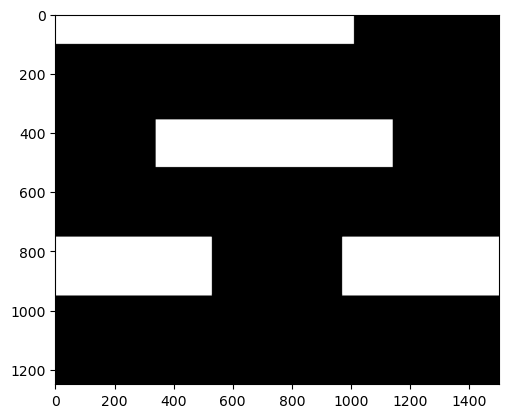

In [97]:
plt.imshow(scaled_img, cmap='gray')

In [98]:
np.savetxt("map_source.csv", scaled_img, delimiter=",")

In [99]:
from mapcalc import Map

In [101]:
testmap = Map("map_source.csv")
testmap.load()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

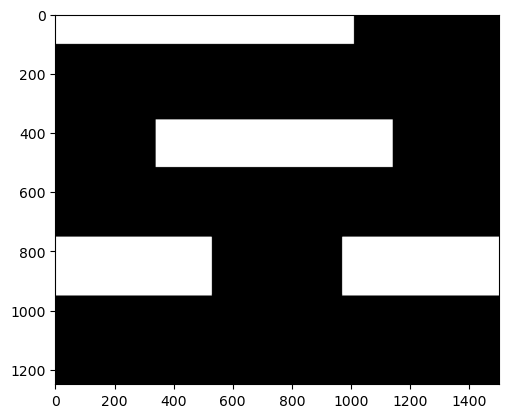

In [104]:
plt.imshow(testmap.binary_map, cmap='gray')